<a href="https://colab.research.google.com/github/Tesniya/pandas-numpy-seaborne/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# importing the  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
#calling the file
dt=pd.read_csv("/content/titanic_dataset.csv")

In [4]:
#displaying colmn
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dt.set_index("PassengerId",inplace=True)

In [6]:
dt.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#rows and colmns
dt.shape

(891, 11)

891 Rows and 11 columns in the data set

In [10]:
#size
dt.size

9801

In [8]:
#variable info
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


11 variables 6 are numerical and 5 are String data.

In [11]:
dt.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#checking null values
dt.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

missing values are Age,Cabin and Embarked

In [13]:
# number of people survived
dt['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
#number of male and female passengers
dt['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
#statistics about the age and fare
dt[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


<Axes: >

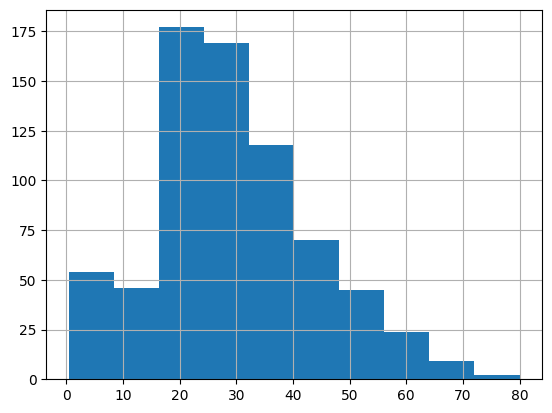

In [18]:
#considering Age variable and find whether it is skewed or not
dt['Age'].hist()


In [19]:
dt['Age'].skew()


0.38910778230082704

The skewness value is between (-0.5,0.5) which also indicate this is a symmetric distribution. Therefore we can replace the null values with mean value.

In [20]:
#find the value to fill the NA values in variable Cabin since this is a categorical value we can use mode to fill NA value
dt['Cabin'].value_counts().sort_values(ascending=False)


B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
F33            3
              ..
D6             1
B82 B84        1
A36            1
B69            1
C148           1
Name: Cabin, Length: 147, dtype: int64

can replace NA values with G6 for Cabin

In [21]:
dt['Embarked'].value_counts().sort_values(ascending=False)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked is 'S' so replace Na values in Embarked with 'S'

In [22]:
#replace the null values
replace_val={'Age':dt['Age'].mean(),'Cabin':'G6','Embarked':'S'	}
dt.fillna(value=replace_val,inplace=True)

In [23]:
dt.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

NA values are removed

In [24]:
#Pclass,Age and Fare to check and handle outliers
#First plot the Boxplot to check whether outliers are present
out_chk=["Pclass","Age","Fare"]

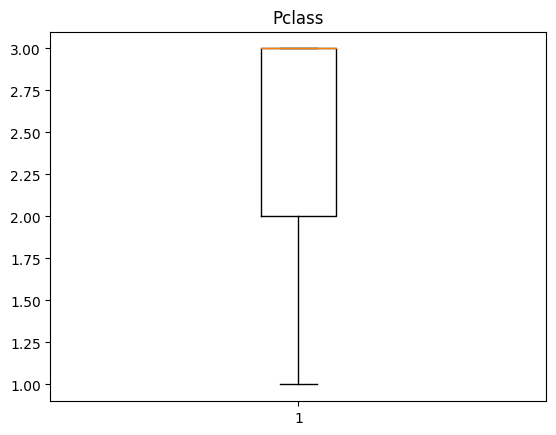

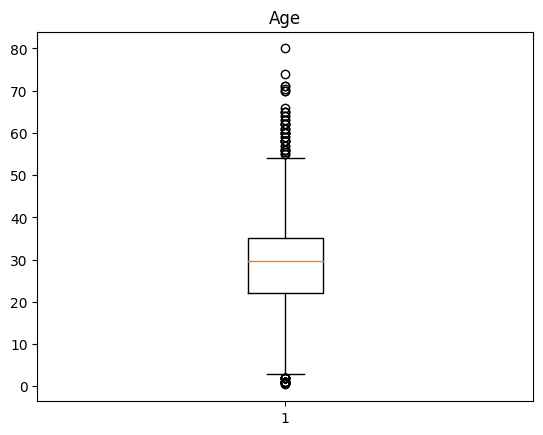

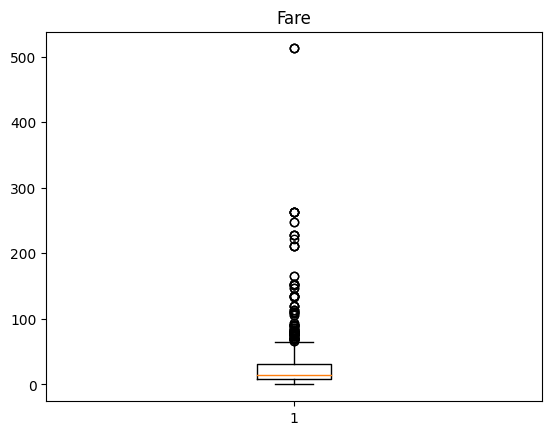

In [25]:
for i in out_chk:
  plt.figure()
  plt.boxplot(dt[i])
  plt.title(i)

box plot Pclass doesn't have an outlier but Age and Fare have outliers. Since Age is Normal we can use z-score to find the outliers and replace. For fare we can check whether it is normal or not

Text(0.5, 1.0, 'Fare')

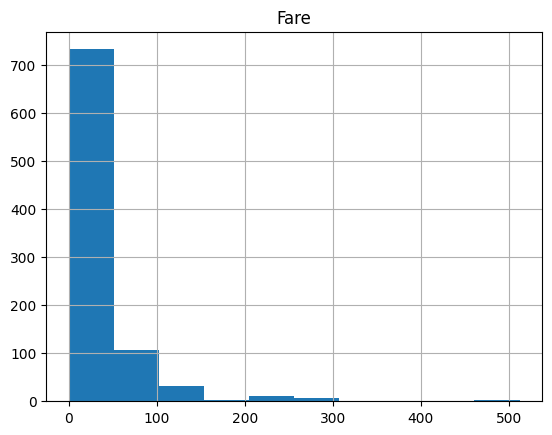

In [26]:
#Histogram for Fare
dt['Fare'].hist()
plt.title('Fare')

In [27]:
dt['Fare'].skew()

4.787316519674893

Since fare is skewed or it is not symmetric, So we can use IQR to find and replace outliers for fare.

In [28]:
#Handling Outliers for Age
from scipy.stats import zscore
z_score=zscore(dt['Age'])

In [29]:
threshold = 2
outliers_index = dt.index[(z_score > threshold) | (z_score < -threshold)] #Use of index

print(outliers_index)


Int64Index([  8,  12,  17,  34,  44,  55,  79,  95,  97, 117, 120, 165, 171,
            173, 175, 184, 194, 196, 206, 233, 253, 262, 269, 276, 281, 298,
            306, 327, 341, 349, 367, 375, 382, 387, 408, 439, 457, 468, 470,
            480, 484, 488, 494, 531, 546, 556, 571, 588, 626, 627, 631, 643,
            645, 648, 660, 673, 685, 695, 746, 756, 773, 789, 804, 825, 828,
            830, 832, 852, 880],
           dtype='int64', name='PassengerId')


In [30]:
#Number of Outliers
len(outliers_index)


69

In [31]:
#we have 891 observations for Age we can drop the outliers
dt.drop(outliers_index,inplace=True)


In [32]:
#Number of observations in data after droping observations
dt.shape

(822, 11)

Text(0.5, 1.0, 'Fare')

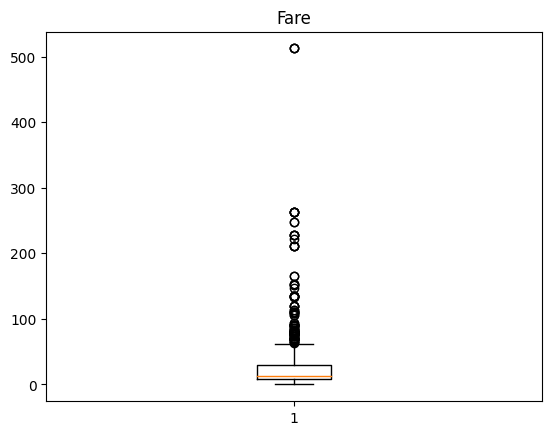

In [33]:
#Handling Outlier for Fare using IQR
#Since we have deleted some observations we can check whether outliers are present in the modified dataset by plotting a boxplot
plt.boxplot(dt['Fare'])
plt.title("Fare")

In [34]:
#Finding the quartiles
Q1=np.percentile(dt['Fare'],25,method='midpoint')
Q2=np.percentile(dt['Fare'],50,method='midpoint')
Q3=np.percentile(dt['Fare'],75,method='midpoint')

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q3 is: ",Q3)



Q1 is:  7.8958
Q2 is:  13.0
Q3 is:  30.0354


In [35]:
#Finding lowe limit and upper limit
IQR=Q3-Q1
low_limi=Q1-1.5*IQR
upper_limi=Q3+1.5*IQR
print("lower value",low_limi)
print("upper value",upper_limi)


lower value -25.313599999999994
upper value 63.2448


In [38]:
#finding outliers in Fare
outlier=[]

for x in dt['Fare']:
  if ((upper_limi)):
    outlier.append(x)

print(outlier)

[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 11.1333, 30.0708, 16.7, 8.05, 31.275, 7.8542, 16.0, 13.0, 18.0, 7.225, 26.0, 13.0, 8.0292, 35.5, 21.075, 31.3875, 7.225, 263.0, 7.8792, 7.8958, 27.7208, 146.5208, 7.75, 82.1708, 52.0, 7.2292, 8.05, 18.0, 11.2417, 9.475, 21.0, 7.8958, 7.8792, 8.05, 15.5, 7.75, 21.6792, 17.8, 39.6875, 7.8, 76.7292, 26.0, 35.5, 10.5, 7.2292, 27.75, 46.9, 7.2292, 80.0, 83.475, 27.9, 27.7208, 15.2458, 10.5, 8.1583, 7.925, 8.6625, 10.5, 46.9, 73.5, 14.4542, 56.4958, 7.65, 7.8958, 8.05, 12.475, 9.0, 9.5, 7.7875, 47.1, 10.5, 15.85, 34.375, 8.05, 263.0, 8.05, 8.05, 7.8542, 61.175, 20.575, 8.05, 63.3583, 23.0, 26.0, 7.8958, 7.8958, 77.2875, 8.6542, 7.925, 7.8958, 7.65, 7.775, 7.8958, 24.15, 52.0, 14.4542, 8.05, 9.825, 14.4583, 7.925, 21.0, 247.5208, 73.5, 8.05, 30.0708, 13.0, 77.2875, 11.2417, 7.75, 7.1417, 22.3583, 6.975, 7.8958, 7.05, 14.5, 26.0, 13.0, 15.0458, 26.2833, 53.1, 9.2167, 79.2, 15.2458, 7.75, 15.85, 6.75, 11.5, 36.75, 7.7958, 34.375, 26.0, 13.0, 1

In [39]:

dt['Fare']=dt['Fare'].clip(lower=low_limi,upper=upper_limi)


In [41]:
#Verifying whether outliers are replaced
outlier=[]

for x in dt['Fare']:
  if ((upper_limi)):
    outlier.append(x)

print(outlier)


[7.25, 63.2448, 7.925, 53.1, 8.05, 8.4583, 51.8625, 11.1333, 30.0708, 16.7, 8.05, 31.275, 7.8542, 16.0, 13.0, 18.0, 7.225, 26.0, 13.0, 8.0292, 35.5, 21.075, 31.3875, 7.225, 63.2448, 7.8792, 7.8958, 27.7208, 63.2448, 7.75, 63.2448, 52.0, 7.2292, 8.05, 18.0, 11.2417, 9.475, 21.0, 7.8958, 7.8792, 8.05, 15.5, 7.75, 21.6792, 17.8, 39.6875, 7.8, 63.2448, 26.0, 35.5, 10.5, 7.2292, 27.75, 46.9, 7.2292, 63.2448, 63.2448, 27.9, 27.7208, 15.2458, 10.5, 8.1583, 7.925, 8.6625, 10.5, 46.9, 63.2448, 14.4542, 56.4958, 7.65, 7.8958, 8.05, 12.475, 9.0, 9.5, 7.7875, 47.1, 10.5, 15.85, 34.375, 8.05, 63.2448, 8.05, 8.05, 7.8542, 61.175, 20.575, 8.05, 63.2448, 23.0, 26.0, 7.8958, 7.8958, 63.2448, 8.6542, 7.925, 7.8958, 7.65, 7.775, 7.8958, 24.15, 52.0, 14.4542, 8.05, 9.825, 14.4583, 7.925, 21.0, 63.2448, 63.2448, 8.05, 30.0708, 13.0, 63.2448, 11.2417, 7.75, 7.1417, 22.3583, 6.975, 7.8958, 7.05, 14.5, 26.0, 13.0, 15.0458, 26.2833, 53.1, 9.2167, 63.2448, 15.2458, 7.75, 15.85, 6.75, 11.5, 36.75, 7.7958, 34.375

In [49]:
le=LabelEncoder()
dt['Sex']=le.fit_transform(dt['Sex'])
dt['Embarked']=le.fit_transform(dt['Embarked'])
dt.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,G6,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,63.2448,C85,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,G6,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,G6,2


In [50]:
minmax=MinMaxScaler()
X=dt[['Pclass', 'Age', 'Fare', 'Embarked']]
X_mm=minmax.fit_transform(X)
X_mm=pd.DataFrame(X_mm,columns=X.columns)

In [51]:
X.describe()

,Pclass,Age,Fare,Embarked
count,822.000000,822.000000,822.000000,822.000000
mean,2.339416,29.164530,23.128677,1.543796
std,0.826114,10.080463,19.838092,0.785002
min,1.000000,4.000000,0.000000,0.000000
25%,2.000000,23.000000,7.895800,1.000000
50%,3.000000,29.699118,13.000000,2.000000
75%,3.000000,34.000000,30.053100,2.000000
max,3.000000,55.500000,63.244800,2.000000


In [52]:
X_mm.describe()

,Pclass,Age,Fare,Embarked
count,822.000000,822.000000,822.000000,822.000000
mean,0.669708,0.488632,0.365701,0.771898
std,0.413057,0.195737,0.313672,0.392501
min,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.368932,0.124845,0.500000
50%,1.000000,0.499012,0.205550,1.000000
75%,1.000000,0.582524,0.475187,1.000000
max,1.000000,1.000000,1.000000,1.000000
